In [1]:
# Import packages # Importing the libraries

# Data preprocessing and Vectorization
import pandas as pd
import numpy as np

# Data Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import io

# For dealing with warnings
import warnings
warnings.filterwarnings("ignore")


# Making the NN model
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator  # Correct module name
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import os
from nltk.corpus import stopwords
#from PIL import Image
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from nltk import word_tokenize
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix

In [2]:
# Parent class
class data_read_write():
    def __init__(self, file_name):
        self.file_name = file_name

    def read_csv_file(self, file_name):
        # Implement the logic to read the CSV file and return a DataFrame
        # For example:
        df = pd.read_csv(self.file_name)
        return df

    def write_data(self, data):
        # Implement the logic to write data to the specified file (self.file_name)
        pass
    

In [3]:
# Child class for data_read_write
class generate_word_cloud(data_read_write):
    def _init_(self):
        pass
    # Child own function
    def variance_column(self, data):
        return variance(data)
    #polynomiphysim
    def word_cloud(self, df_column, output_image_file):
        text = " ".join(review for review in df_column)
        stopwords = set (STOPWORDS)
        stopwords.update(["subject"])
        wordcloud = WordCloud(width = 1200, height = 800, stopwords=stopwords, max_font_size = 50, margin=0, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        wordcloud.to_file(output_image_file)
        return

In [4]:
# Child class for data_read_write
class data_cleaning(data_read_write):
    def _init_(self):
        pass
    def message_cleaning(self, message):
        Test_punc_removed = [char for char in message if char not in string.punctuation]
        Test_punc_removed_join = ''.join(Test_punc_removed)
        Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower()not in stopwords.words('english')]
        final_join = ' '.join(Test_punc_removed_join_clean)
        return final_join
    
    def apply_to_column(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning)
        return data_processed
    

In [5]:
# Define the apply_embedding_and_model class
class ApplyEmbeddingAndModel:
    def __init__(self, data_obj):
        self.data_obj = data_obj
    
    def apply_count_vector(self, v_data_column):
        vectorizer = CountVectorizer(min_df=2, analyzer="word", tokenizer=None, preprocessor=None, stop_words=None)
        return vectorizer.fit_transform(v_data_column)
    
# Define the cv_object class
class CVObject:
    def __init__(self):
        pass
    
    def apply_naive_bayes(self, X, y):
        # Divide the data into training and testing prior to training
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # Training the model
        NB_classifier = MultinomialNB()  # Instantiate the MultinomialNB with parentheses
        NB_classifier.fit(X_train, y_train)  # Fit the classifier to the training data
        # Predicting the test set results
        y_predict_test = NB_classifier.predict(X_test)
        # Calculate and visualize the confusion matrix
        cm = confusion_matrix(y_test, y_predict_test)
        
        # Evaluate the model
        print(classification_report(y_test, y_predict_test))
        print("test set")     
        
        print("\Accuracy Score: " + str(metrics.accuracy_score(y_test, y_predict_test)))
        print("f1 Score: " + str(metrics.f1_score(y_test, y_predict_test)))
        print("Recall: " + str(metrics.recall_score(y_test, y_predict_test)))
        print("Precision: " + str(metrics.precision_score(y_test, y_predict_test)))
        
        class_names = ['ham', 'spam']
        titles_options = [("confusion matrix, without normalization", None), 
                           ("Normalized confusion matrix", 'true')]
        for title, normalize in titles_options:
            
            # Plot the confusion matrix using seaborn heatmap
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
            plt.title("Confusion Matrix")
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.show()
            
        
        # Generate a no skill prediction (majority class)
        ns_probs = [0 for _ in range (len(y_test))]
        # Predict probabilities
        lr_probs = NB_classifier.predict_proba(X_test)
        # Keep the probability for the positive outcome only
        lr_probs = lr_probs[:, 1]
        # Calculate scores
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc = roc_auc_score(y_test, lr_probs)
        # Summarise score
        #print('No skill: ROC AUC=%.3f' % (ns_auc))
        #print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))
        # Calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
        # Plot the roc curve for the model
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill: ROC AUC=%.3f' % (ns_auc))
        plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes: ROC AUC=%.3f' % (lr_auc))
        # Axes labels
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # Show the plot
        plt.show()
        
        return
    
    
    def apply_svm(self, X, y):
        # DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # Training the model
        # 'linear', 'poly', 'rbf'
        params = {'kernel': 'linear', 'C': 2, 'gamma': 1}
        svm_cv = svm.SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'], probability=True)
        svm_cv.fit(X_train, y_train)
        # Predicting the Test set results
        y_predict_test = svm_cv.predict(X_test)
        cm = confusion_matrix(y_test, y_predict_test)
        # sns.heatmap(cm, annot=True)
        # Evaluate the model
        print(classification_report(y_test, y_predict_test))
        print("test set")
        
        print("\Accuracy Score: " + str(metrics.accuracy_score(y_test, y_predict_test)))
        print("f1 Score: " + str(metrics.f1_score(y_test, y_predict_test)))
        print("Recall: " + str(metrics.recall_score(y_test, y_predict_test)))
        print("Precision: " + str(metrics.precision_score(y_test, y_predict_test)))
           
        class_names = ['ham', 'spam']
        titles_options = [("confusion matrix, without normalization", None), 
                           ("Normalized confusion matrix", 'true')]
        for title, normalize in titles_options:
        
        # Plot the confusion matrix using seaborn heatmap
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
            plt.title("Confusion Matrix")
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.show()
        
        # Generate a no skill prediction (majority class)
        ns_probs = [0 for _ in range (len(y_test))]
        # Predict probabilities
        lr_probs = svm_cv.predict_proba(X_test)
        # Keep the probability for the positive outcome only
        lr_probs = lr_probs[:, 1]
        # Calculate scores
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc = roc_auc_score(y_test, lr_probs)
        # Summarise score
        #print('No skill: ROC AUC=%.3f' % (ns_auc))
        #print('SVM: ROC AUC=%.3f' % (lr_auc))
        # Calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
        # Plt the roc curve for the model
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill: ROC AUC=%.3f' % (ns_auc))
        plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM: ROC AUC=%.3f' % (lr_auc))
        # Axes labels
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        #shw the legend
        plt.legend()
        # Show the plot
        plt.show()
        
        return cv_object

In [6]:
pwd

'C:\\Users\\ndivh\\Downloads\\Code and Dataset'

In [7]:
# Import data
df = pd.read_csv("spam.csv", encoding='latin-1', sep=';')
df

,Column1,Column2,Column3,Column4,Column5
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
# Assuming you have a dataframe called 'df' with unnecessary columns
columns_to_drop = ['Column3', 'Column4', 'Column5']

# Check if the columns exist in the dataframe
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(existing_columns, axis=1, inplace=True)

# Alternative way for removing unnecessary column and rename column
df.rename(columns = {'Column1': 'Catergory', 'Column2': 'Text'}, inplace = True)
df

,Catergory,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Visualise dataset
# Lets see which message is most popular ham/spam message
df.groupby('Catergory').describe()

Text                                                               
          count unique                                                top freq
Catergory                                                                     
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [10]:
# Visualise dataset
# Lets see which message is most popular ham/spam message
df.groupby('Text').describe()

Catergory                 
                                                       count unique  top freq
Text                                                                         
 &lt;#&gt;  in mca. But not conform.                       1      1  ham    1
 &lt;#&gt;  mins but i had to stop somewhere fi...         1      1  ham    1
 &lt;DECIMAL&gt; m but its not a common car her...         1      1  ham    1
 and  picking them up from various points                  1      1  ham    1
 came to look at the flat, seems ok, in his 50s...         1      1  ham    1
...                                                      ...    ...  ...  ...
ÌÏ still got lessons?  ÌÏ in sch?                          1      1  ham    1
ÌÏ takin linear algebra today?                             1      1  ham    1
ÌÏ thk of wat to eat tonight.                              1      1  ham    1
ÌÏ v ma fan...                                             1      1  ham    1
ÌÏ wait 4 me in sch i finish ard 5..                       1      1  ham    1

[5169 rows x 4 columns]

In [11]:
# Importing NLTK for natural language processing
import nltk

df['num_characters'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [12]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [13]:
# ## spam
# df[df['Catergory'] == 1][['num_characters','num_words','num_sentences']].describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Catergory       5572 non-null   object
 1   Text            5572 non-null   object
 2   num_characters  5572 non-null   int64 
 3   num_words       5572 non-null   int64 
 4   num_sentence    5572 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 217.8+ KB


In [14]:
df.drop

<bound method DataFrame.drop of      Catergory                                               Text  \
0          ham  Go until jurong point, crazy.. Available only ...   
1          ham                      Ok lar... Joking wif u oni...   
2         spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3          ham  U dun say so early hor... U c already then say...   
4          ham  Nah I don't think he goes to usf, he lives aro...   
...        ...                                                ...   
5567      spam  This is the 2nd time we have tried 2 contact u...   
5568       ham              Will Ì_ b going to esplanade fr home?   
5569       ham  Pity, * was in mood for that. So...any other s...   
5570       ham  The guy did some bitching but I acted like i'd...   
5571       ham                         Rofl. Its true to its name   

      num_characters  num_words  num_sentence  
0                111         24             2  
1                 29          8            

In [15]:
# Turn spam/ham into numerical data, create new column called 'spam'
df['spam'] = df['Catergory'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Catergory,Text,num_characters,num_words,num_sentence,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0


In [16]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
## spam
df[df['spam'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


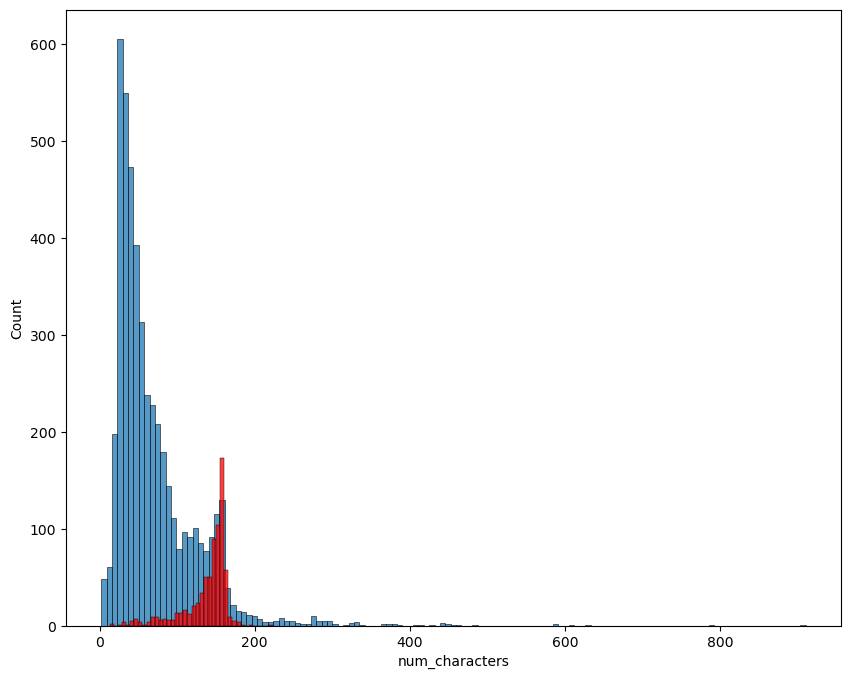

In [18]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')
plt.show()

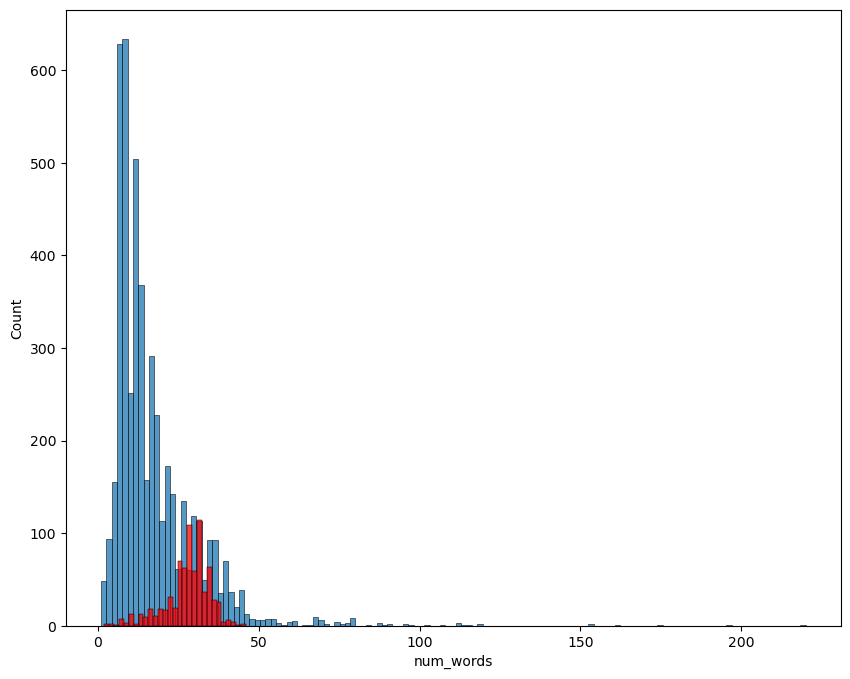

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'],color='red')
plt.show()

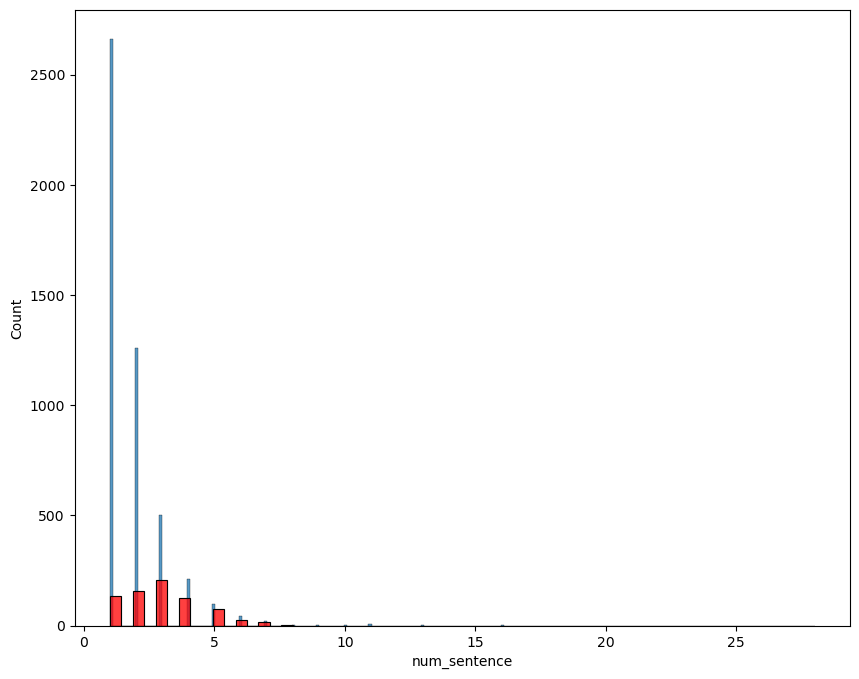

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_sentence'])
sns.histplot(df[df['spam'] == 1]['num_sentence'],color='red')
plt.show()

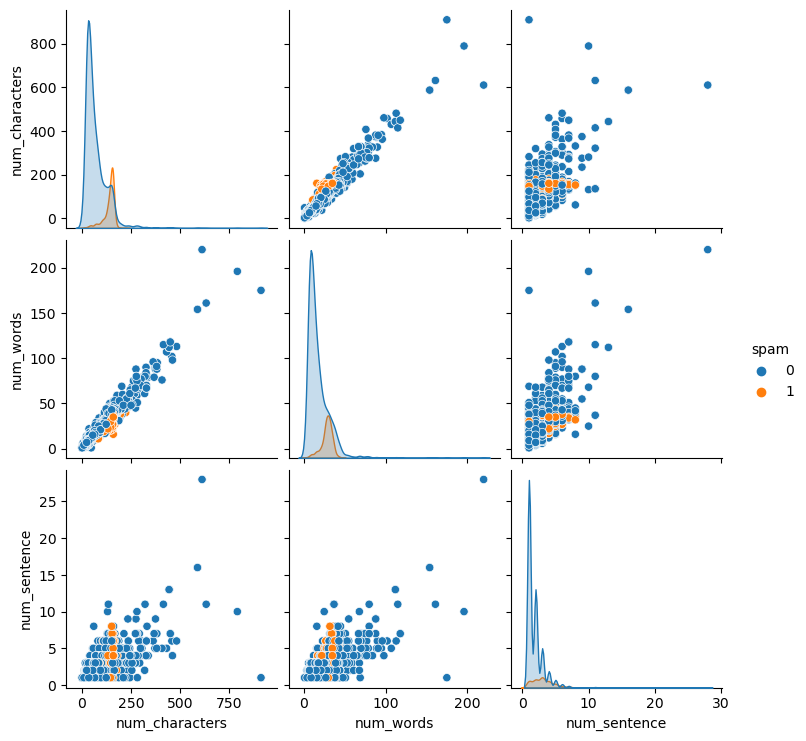

In [21]:
sns.pairplot(df,hue='spam')
plt.show()

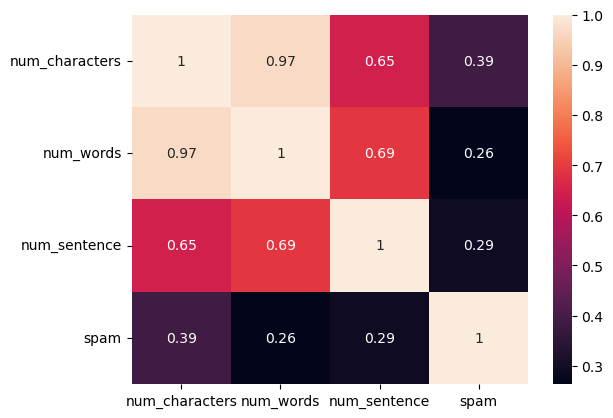

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='spam', ylabel='num_characters'>

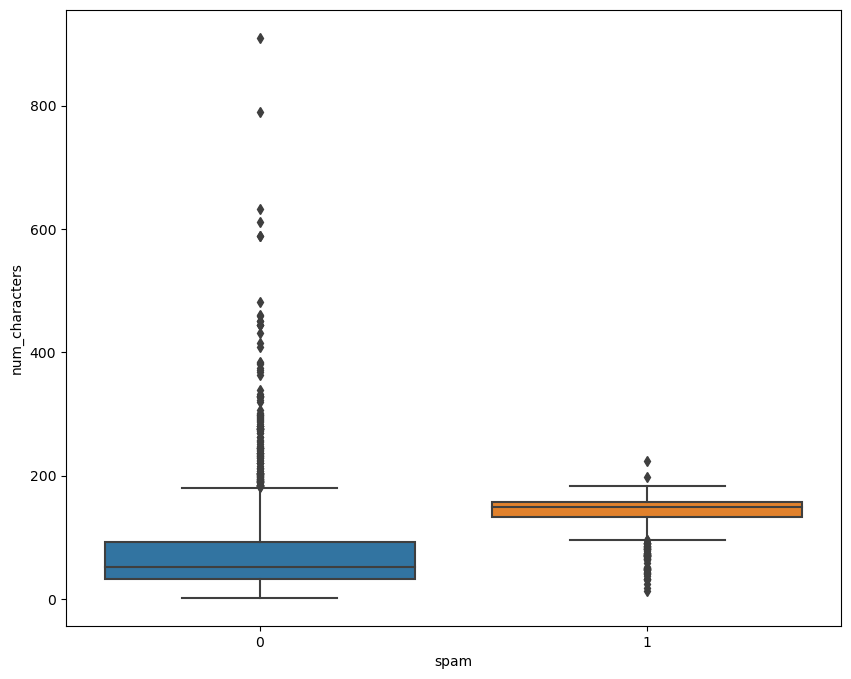

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(x='spam',y='num_characters',data=df)

In [24]:
# create train/test split
x_train, x_test, y_train, y_test = train_test_split(df.Text, df.spam, test_size = 0.25)
x_train.describe()

count                       4179
unique                      3936
top       Sorry, I'll call later
freq                          21
Name: Text, dtype: object

In [25]:
# find word count and store data as a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [26]:
df.head()
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Catergory       5572 non-null   object
 1   Text            5572 non-null   object
 2   num_characters  5572 non-null   int64 
 3   num_words       5572 non-null   int64 
 4   num_sentence    5572 non-null   int64 
 5   spam            5572 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 261.3+ KB


In [27]:
# Assuming your DataFrame is named 'df'
# Use the isnull() function to check for null values
null_values = df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display the null counts
print(null_counts)

Catergory         0
Text              0
num_characters    0
num_words         0
num_sentence      0
spam              0
dtype: int64


In [28]:
# Handling Missing Values
# Check for missing values
print(df.isnull().sum())

Catergory         0
Text              0
num_characters    0
num_words         0
num_sentence      0
spam              0
dtype: int64


In [29]:
# Fill missing values with mean for multiple columns
columns_to_fill = ['Catergory', 'Text']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

# Check if there are any remaining missing values
print(df.isnull().sum())
# Check available column names

Catergory         0
Text              0
num_characters    0
num_words         0
num_sentence      0
spam              0
dtype: int64


In [30]:
# Removing Duplicates
# Check for duplicates
print(df.duplicated().sum())

403


In [31]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(5169, 6)

In [32]:
df

,Catergory,Text,num_characters,num_words,num_sentence,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0


In [33]:
# Lets get the length of the message
df['length'] = df['Text'].apply(len)
df['length'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: length, Length: 5169, dtype: int64>

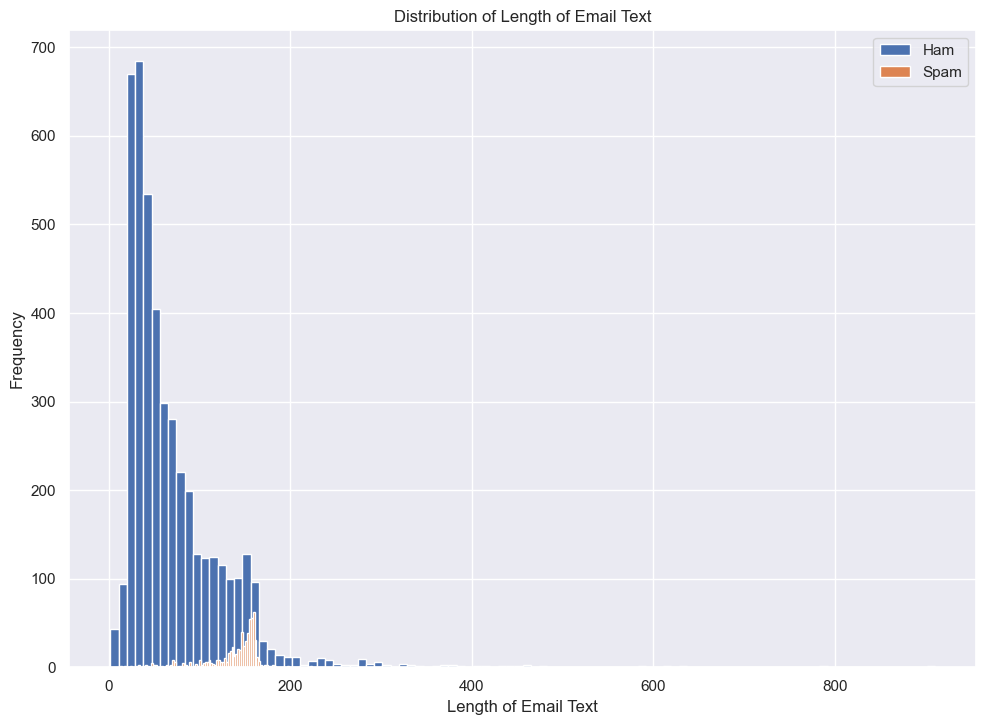

In [34]:
# Data_frame['length'].plot(bins=100, kind='hist')
# Length of characters for ham emails is more as compares to spam emails
sns.set(rc={'figure.figsize':(11.7,8.27)})
ham_messages_length = df[df['spam']==0]
spam_messages_length = df[df['spam']==1]

ham_messages_length['length'].plot(bins=100, kind='hist',label = 'Ham')
spam_messages_length['length'].plot(bins=100, kind='hist',label = 'Spam')
# sns.displot(ham_messages_length['length'], bins=10, norm_hist = True, label = 'Ham')
# sns.displot(spam_messages_length['length'], bins=10, norm_hist = True, label = 'spam')
plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()

In [35]:
#data_frame['spam']==0
df[df['spam']==0].Text.values

ham_words_length = [len(word_tokenize(title)) for title in df[df['spam']==0].Text.values]
spam_words_length = [len(word_tokenize(title)) for title in df[df['spam']==1].Text.values]
print(max(ham_words_length))
print(max(spam_words_length))

220
46


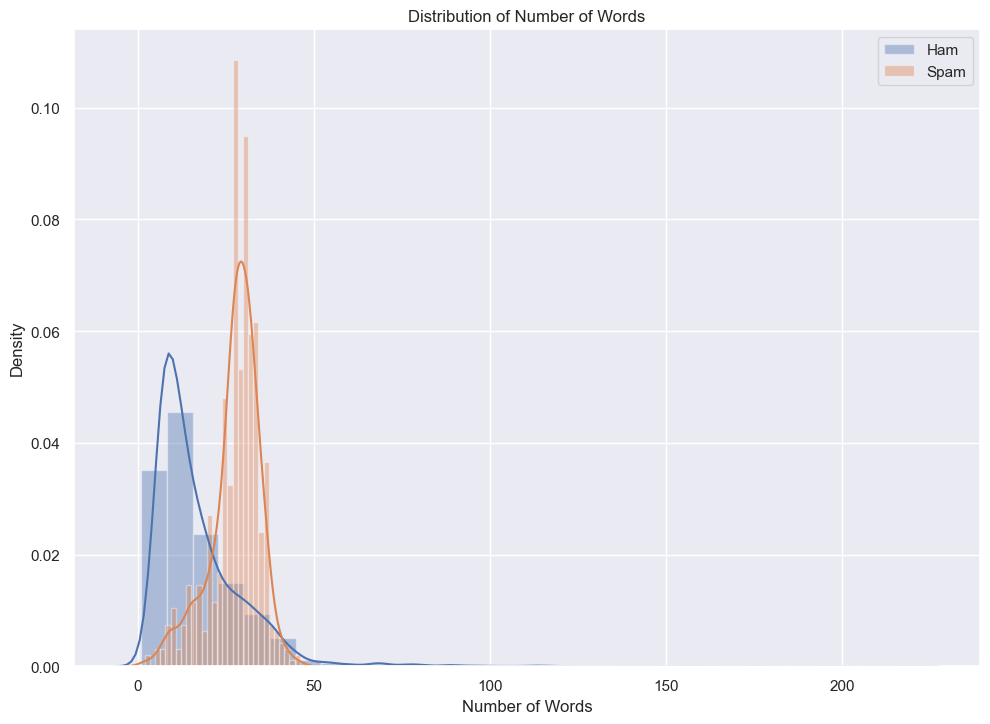

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(ham_words_length, norm_hist = True, bins = 30, label = 'Ham')
ax = sns.distplot(spam_words_length, norm_hist = True, bins = 30, label = 'Spam')

#plt.legend()
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.legend()

plt.show()

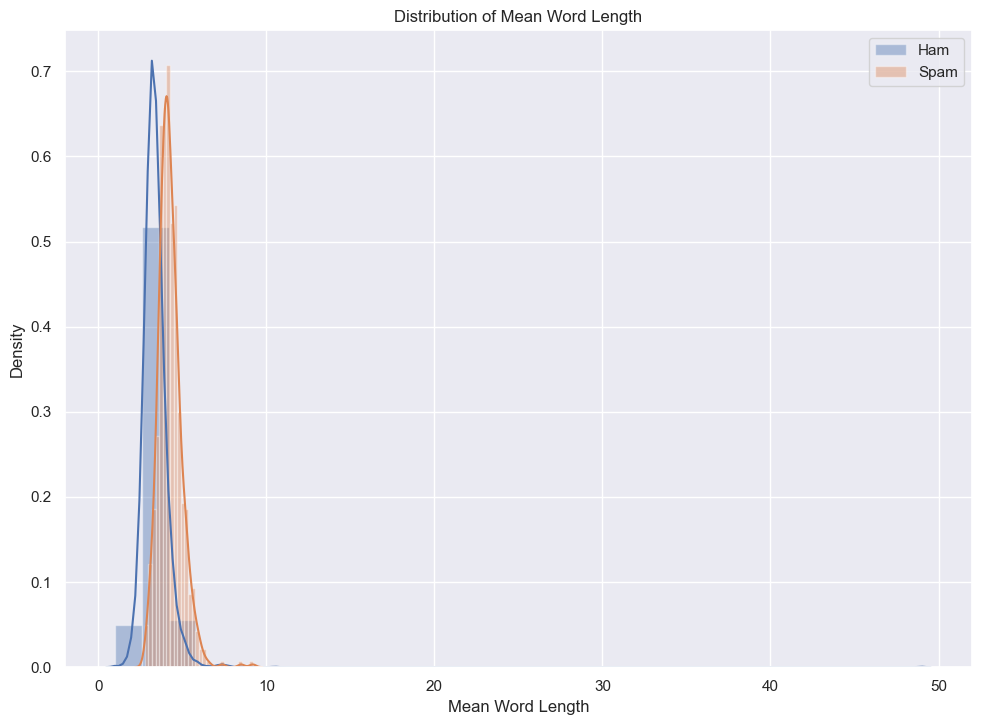

In [37]:
# Mean words length
def mean_word_length(x):
    word_lengths = np.array([])
    for word in word_tokenize(x):
        word_lengths = np.append(word_lengths, len(word))
    return word_lengths.mean()

ham_meanword_length = df[df['spam']==0].Text.apply(mean_word_length)
spam_meanword_length = df[df['spam']==1].Text.apply(mean_word_length)

sns.distplot(ham_meanword_length, norm_hist = True, bins = 30, label = 'Ham')
sns.distplot(spam_meanword_length , norm_hist = True, bins = 30, label = 'Spam')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')
plt.legend()
plt.show()

# There is no significant difference for the length of words used by ham and spam emails

Ham Mean: 0.271
Spam Mean: 0.205


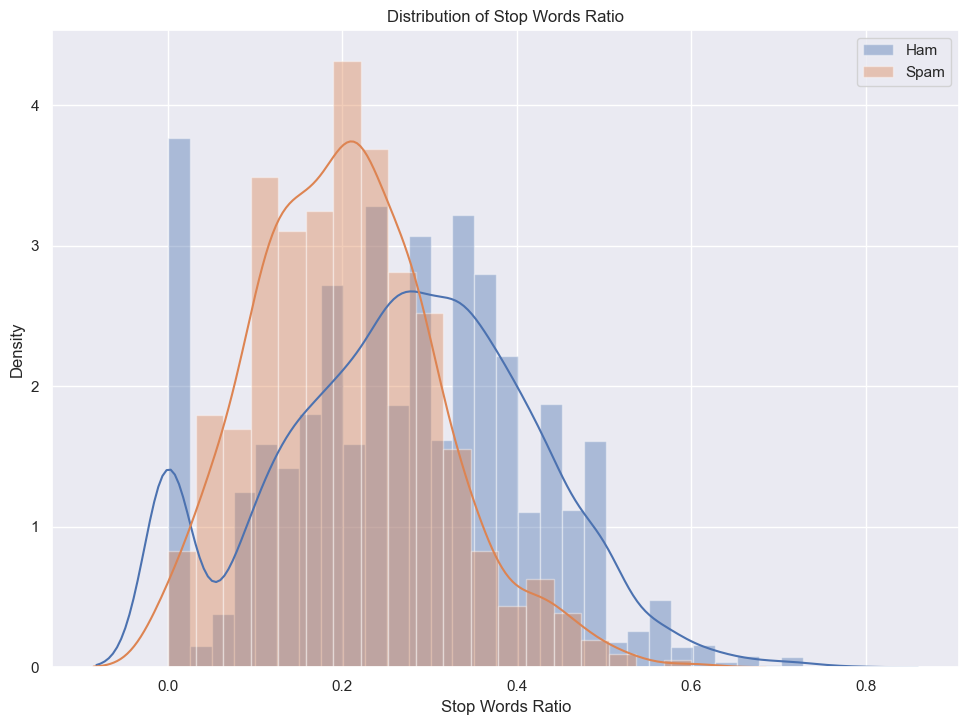

In [38]:
# Checking the ratio of stop words
# Both spam and ham contains stopwords
# All Spam emails contain stop words with a mean of 0.281
# All Ham emails contain stop words with a mean of 0.278
# But we can see from the graph, spam email contain high stop words ratio as compared to ham emails.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word in stop_words:
            num_stop_words += 1
        num_total_words += 1
    return num_stop_words/num_total_words

ham_stopwords = df[df['spam']==0].Text.apply(stop_words_ratio)
spam_stopwords = df[df['spam']==1].Text.apply(stop_words_ratio)

sns.distplot(ham_stopwords, norm_hist = True, label = 'Ham')
sns.distplot(spam_stopwords, label = 'Spam')

print('Ham Mean: {:.3f}'.format(ham_stopwords.values.mean()))
print('Spam Mean: {:.3f}'.format(spam_stopwords.values.mean()))
plt.title('Distribution of Stop Words Ratio')
plt.xlabel('Stop Words Ratio')
plt.legend()

In [39]:
spam_stopwords

2       0.135135
5       0.333333
8       0.187500
9       0.290323
11      0.129032
          ...   
5537    0.111111
5540    0.000000
5547    0.200000
5566    0.233333
5567    0.228571
Name: Text, Length: 653, dtype: float64

Spam percentage = 12.633004449603405 %
Ham percentage = 87.3669955503966 %


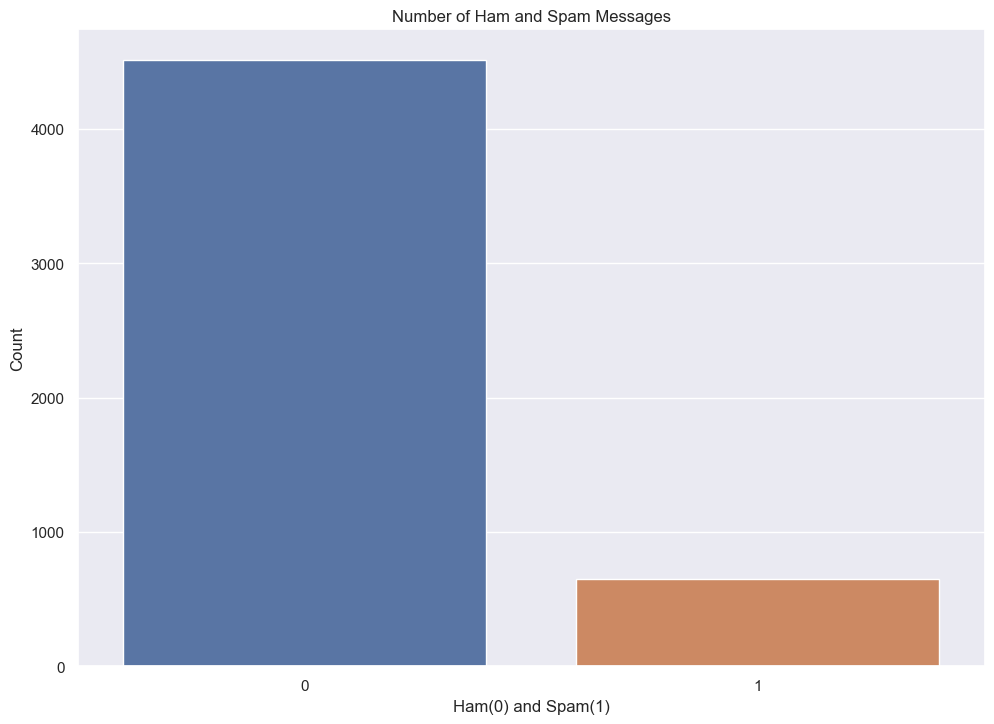

In [40]:
# Lets dividie the messages into spam and ham
ham = df[df['spam']==0]
spam = df[df['spam']==1]
# Plot histograms of message lengths
spam['length'].plot(bins=60, kind='hist')
ham['length'].plot(bins=60, kind='hist')
df['Ham(0) and Spam(1)'] = df['spam']
# Calculate the percentage of spam and ham messages
print('Spam percentage =', (len(spam) / len(df) )*100,"%")
print('Ham percentage =', (len(ham) / len(df) )*100,"%")
# Create a count plot
#sns.countplot(df['Ham(0) and Spam(1)'], label="Count")
sns.countplot(x='Ham(0) and Spam(1)', data=df)
plt.xlabel('Ham(0) and Spam(1)')
plt.ylabel('Count')
plt.title('Number of Ham and Spam Messages')
plt.show()


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming the last column contains the target labels (spam or not spam)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target labels

# Encode string labels into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical features
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

# Define the number of splits (k)
n_splits = 5

# Initialize StratifiedKFold with desired number of splits
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Iterate through the splits
for fold_idx, (train_indices, test_indices) in enumerate(stratified_kfold.split(X, y)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and test data for this fold
    X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
    y_train_fold, y_test_fold = y[train_indices], y[test_indices]
    
    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_fold)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Store accuracy for this fold
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {average_accuracy}")


Fold 1:
Accuracy: 1.0
Fold 2:
Accuracy: 1.0
Fold 3:
Accuracy: 1.0
Fold 4:
Accuracy: 1.0
Fold 5:
Accuracy: 1.0
Average Accuracy: 1.0


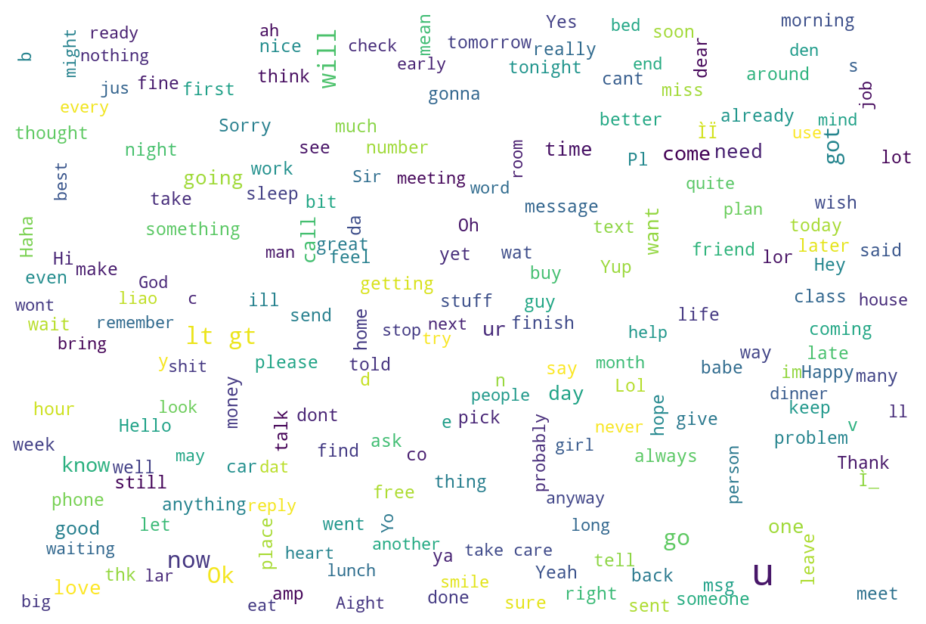

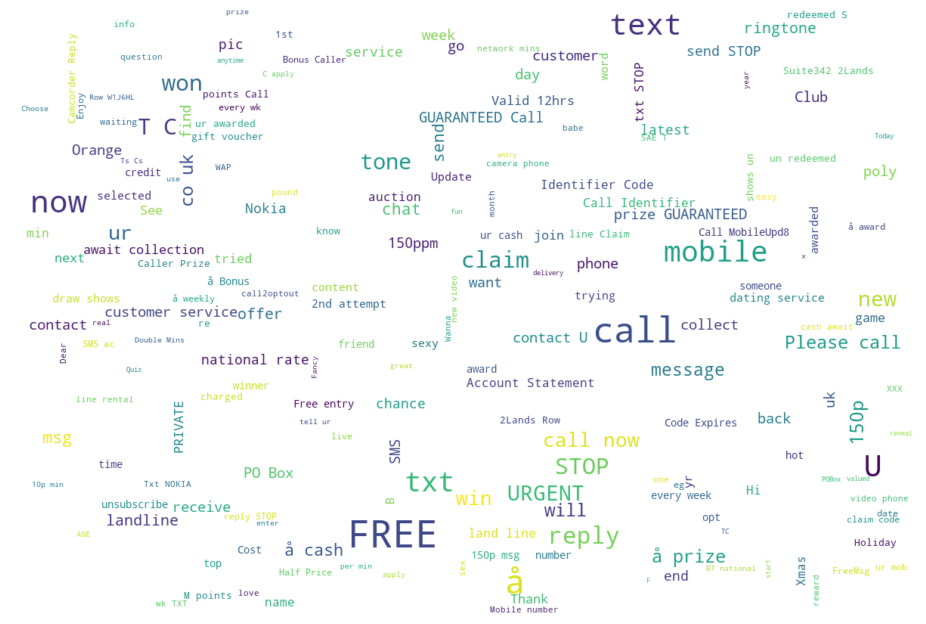

In [42]:
word_cloud_obj = generate_word_cloud("spam.txt")
word_cloud_obj.word_cloud(ham["Text"], "ham_word_cloud.png")
word_cloud_obj.word_cloud(spam["Text"], "spam_word_cloud.png")

In [43]:
# Stopwords are commonly used words in English which have no contextual meaning in an sentence. 
#So therefore we remove them before classification.
data_clean_obj = data_cleaning("spam.txt")
# lets test the newly added function
#df['clean_Column1'] = df['Column1'].apply(message_cleaning)
# data_frame['clean_text'] = data_farme['text'].apply(data_clean_obj.message_cleaning)
df['clean_Text'] = data_clean_obj.apply_to_column(df['Text'])
df

,Catergory,Text,num_characters,num_words,num_sentence,spam,length,Ham(0) and Spam(1),clean_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,111,0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,29,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,155,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,49,0,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,61,0,Nah dont think goes usf lives around though
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,1,161,1,2nd time tried 2 contact u U å£750 Pound prize...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0,37,0,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,57,0,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,125,0,guy bitching acted like id interested buying s...


In [44]:
df.head()

,Catergory,Text,num_characters,num_words,num_sentence,spam,length,Ham(0) and Spam(1),clean_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,111,0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,29,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,155,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,49,0,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,61,0,Nah dont think goes usf lives around though


In [45]:
data_obj = data_clean_obj.apply_to_column(df['Text'])  # Replace 'Your_Data_Object' with the actual variable containing the data and the 'df' attribute.
data_obj

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: Text, Length: 5169, dtype: object

In [46]:
# APPLY COUNT VECTORIZER TO OUR MESSAGE LIST

# Define the file name
file_name = "spam1.csv"

# Initialize the data_read_write class with the file name
data_obj = data_read_write(file_name)

# Create an instance of apply_embedding_and_model
#cv_object = apply_embedding_and_model(data_obj)
cv_object = ApplyEmbeddingAndModel(data_obj)
#class ApplyEmbeddingAndModel:
# Apply CountVectorizer to the 'clean_Column2' column
spamham_countvectorizer = cv_object.apply_count_vector(df['clean_Text'])

In [47]:
# Separating Descriptive and Target Feature
X = spamham_countvectorizer
label = df['spam'].values
y = label

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       909
           1       0.90      0.89      0.89       125

    accuracy                           0.97      1034
   macro avg       0.94      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034

test set
\Accuracy Score: 0.9738878143133463
f1 Score: 0.891566265060241
Recall: 0.888
Precision: 0.8951612903225806


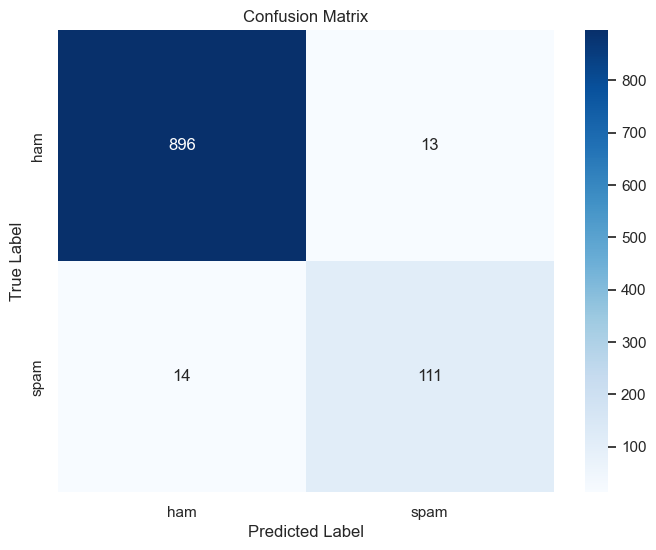

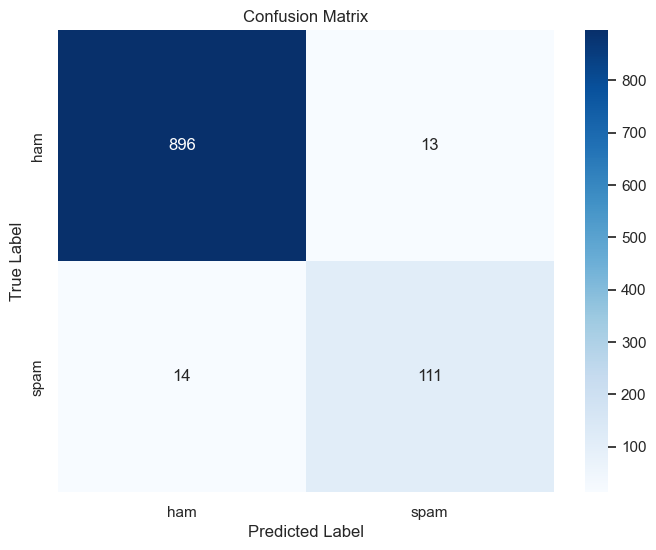

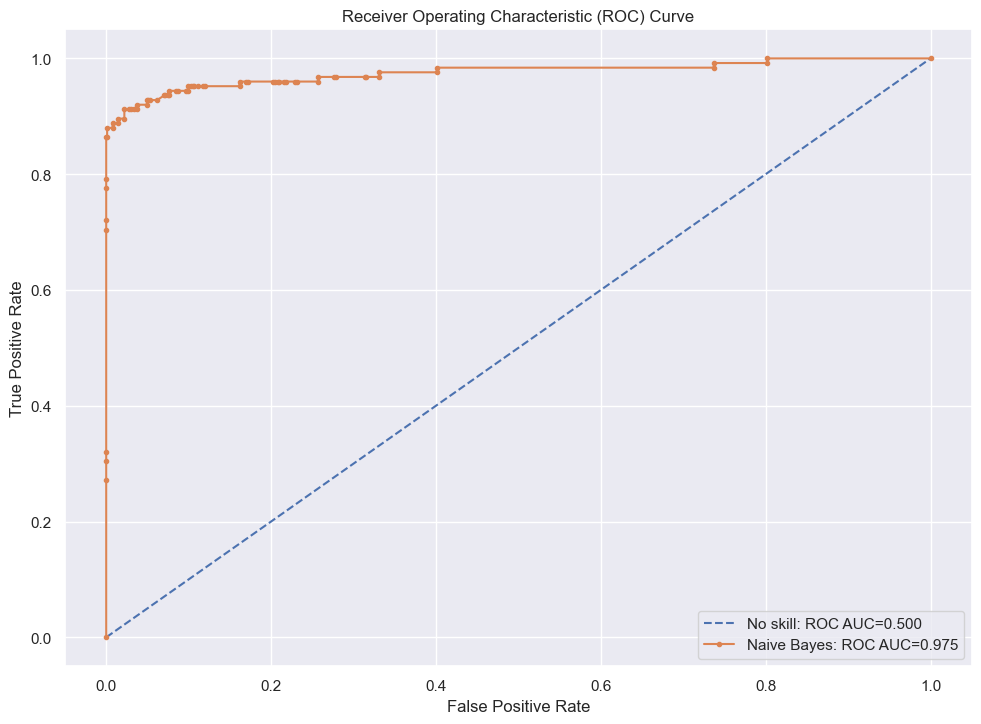

In [48]:
# Assuming you have already defined the df DataFrame, X, and y data

# Create an instance of cv_object
cv_object_instance = CVObject()

# Apply Naive Bayes classifier using the previously created CountVectorizer result
cv_object_instance.apply_naive_bayes(spamham_countvectorizer, y)
#cv_object_instance.apply_embedding_and_model(X, y)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       901
           1       0.94      0.86      0.90       133

    accuracy                           0.98      1034
   macro avg       0.96      0.93      0.94      1034
weighted avg       0.98      0.98      0.98      1034

test set
\Accuracy Score: 0.9758220502901354
f1 Score: 0.9019607843137255
Recall: 0.8646616541353384
Precision: 0.9426229508196722


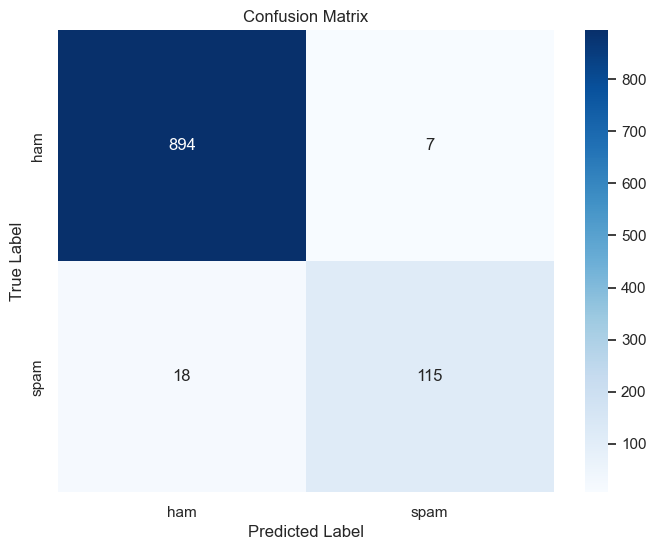

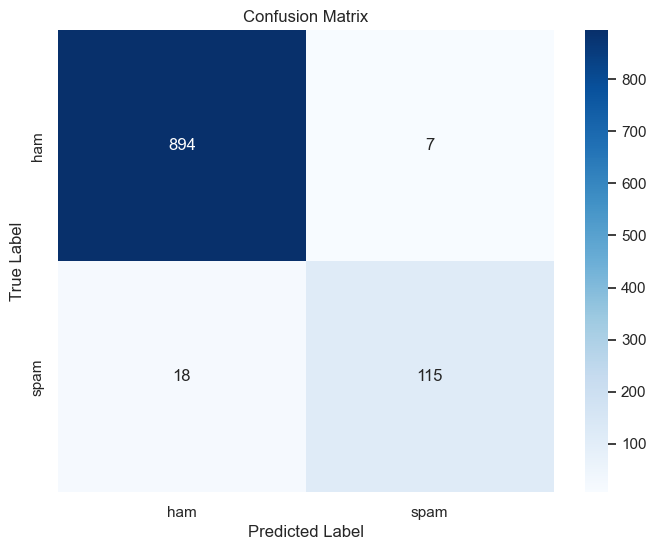

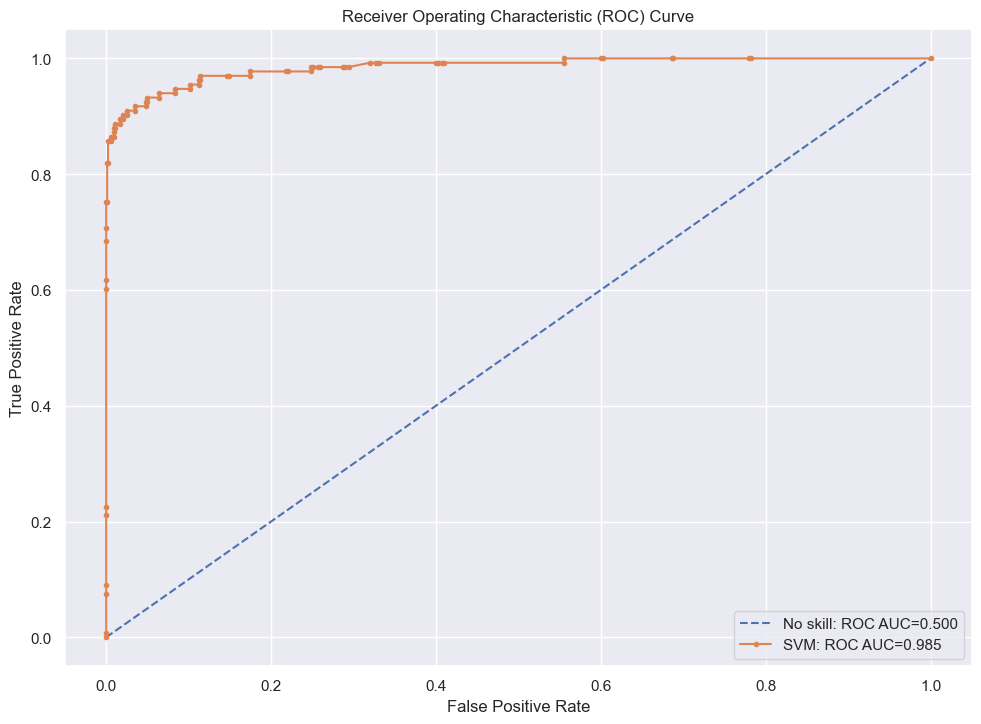

In [49]:
# Assuming you have already defined the df DataFrame, X, and y data

# Create an instance of cv_object
cv_object_instance = CVObject()

# Apply svm classifier using the previously created CountVectorizer result
cv_object_instance.apply_svm(spamham_countvectorizer, y)

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np

def kappa_normalized_by_class_imbalance(y_true, y_pred):
    # Step 1: Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Step 2: Calculate Observed Agreement (Po)
    total = np.sum(cm)
    po = np.trace(cm) / total
    
    # Step 3: Calculate Expected Agreement (Pe)
    row_sum = np.sum(cm, axis=0)
    col_sum = np.sum(cm, axis=1)
    pe = np.sum(row_sum * col_sum) / (total ** 2)
    
    # Step 4: Calculate Kappa
    kappa = (po - pe) / (1 - pe)
    
    # Step 5: Normalize Kappa by class imbalance
    imbalance_factor = np.sqrt(np.sum(row_sum * col_sum) / (total ** 2))
    kappa_normalized = kappa * imbalance_factor
    
    return kappa_normalized

# Example usage:
y_true = [0, 1, 0, 1, 0, 0, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
kappa_normalized = kappa_normalized_by_class_imbalance(y_true, y_pred)
print("Normalized Kappa:", kappa_normalized)


Normalized Kappa: 0.3535533905932738


## Cross Validation

above we see that measuring perfromance change every time runing code.
so i applied cross validation to get the best possible result.

i also want to get classifiaction report for best mesured performance
and its confusion matrix so i created that function below to do that !

In [51]:
tprs = [] #ROC
aucs = [] #AUC
class_repo_lst = [] #Classification reports
acc_repo = [] #accuracies
conv_lst = [] #Confusion matrices
accruacy_scores_lst = []

In [52]:
# # create train/test split
# x_train, x_test, y_train, y_test = train_test_split(df.Text, df.spam, test_size = 0.25)
# x_train.describe()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       226
        Spam       1.00      1.00      1.00        33

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259



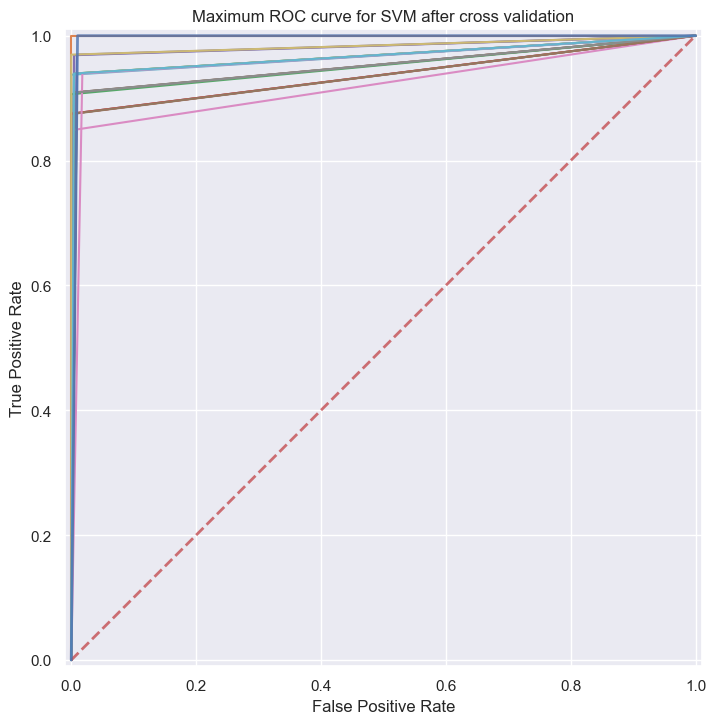

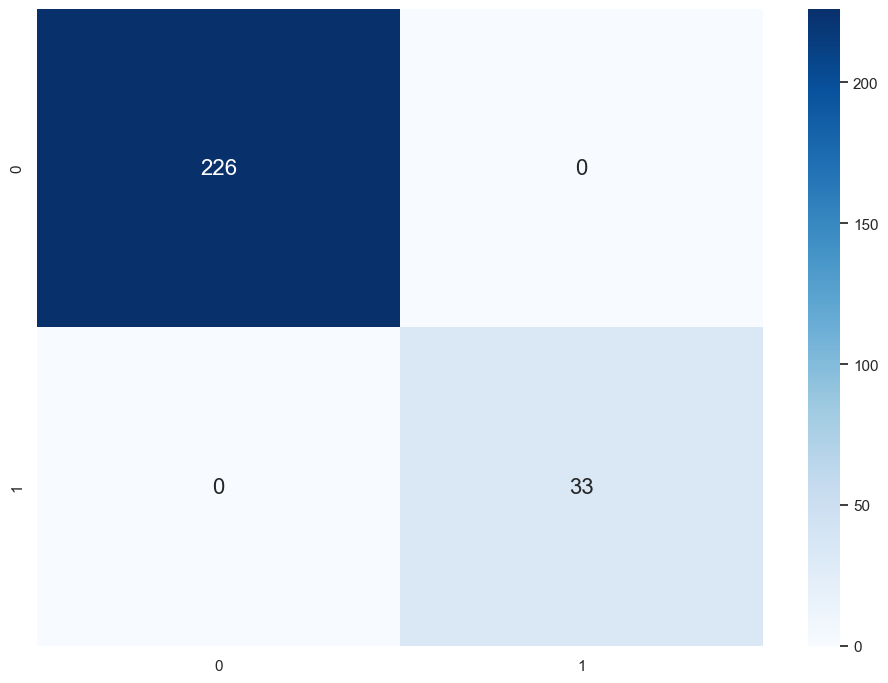

'Max_Accuracy : 1.0%'

In [78]:
from sklearn.metrics import RocCurveDisplay

class CVObject:
    def __init__(self):
        pass
    
    # Other methods...

    def cross_validate_Model(self, classifier, choice):
        '''
        parameters : 
        1- classifier : Algorithm to train
        2- choice : choose what you see.
                    - 'r': Report classification & Roc_Curve
                    - 'c': Confusion Matrix
        '''
        #----------Data------------------
        X = np.array(df.Text)
        y = np.array(df.spam)
        X, y = X[y != 2], y[y != 2]
        #----------Variables-------------
        cv = StratifiedKFold(n_splits=20)
        mean_fpr = np.linspace(0, 1, 100)

        #--------------------------------
        fig, ax = plt.subplots()
        vec = CountVectorizer()

        for i, (train, test) in enumerate(cv.split(X, y)):
            training_data = vec.fit_transform(X[train])
            testing_data = vec.transform(X[test])

            classifier.fit(training_data, y[train])  # Fitting algorithm

            y_pred = classifier.predict(testing_data)  # Getting predictions

            accruacy_scores_lst.append(accuracy_score(y[test], y_pred))  # Save all accuracies in list

            #=========================================================================
            repo = classification_report(y[test], y_pred, target_names=['Ham','Spam'])
            class_repo_lst.append(repo)
            acc_repo.append(float(repo[203:207]))  # Get accuracy on spam
            indx = acc_repo.index(max(acc_repo))
            #=========================================================================== 

            if choice == 'c':
                conv_lst.append(confusion_matrix(y[test], y_pred))

            if choice == 'r':
                # Plot every fold
                fpr, tpr, _ = roc_curve(y[test], y_pred)
                roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)

                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0

                tprs.append(interp_tpr)
                aucs.append(auc(fpr, tpr))

        if choice == 'r':
            # Plotting AUC
            ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

            mean_tpr = np.max(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)

            # Plotting ROC
            ax.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

            print(class_repo_lst[indx])
            
            class_names = ['ham', 'spam']

        if choice == 'c':
            conv = conv_lst[indx]
            sns.heatmap(conv, annot=True, fmt="d", cmap="Blues",annot_kws={"size": 16})
#             xticklabels=class_names, yticklabels=class_names)            
            plt.show()
                        
#             fig, ax = plt.subplots(figsize=(10, 6))
#             ax.plot(fpr, tpr, color='orange', label='Random Forest: ROC AUC=%.3f' % (rf_auc))
#             ax.plot(fpr, fpr, color='blue', linestyle='--', label='No skill: ROC AUC=%.3f' % (ns_auc))
            
        if choice == 'r':
            ax.set(title="Maximum ROC curve for SVM after cross validation")
            ax.get_legend().remove()
            plt.show()
            
        class_repo_lst.clear()
        acc_repo.clear()
        conv_lst.clear()

        return "Max_Accuracy : " + str(round(np.array(accruacy_scores_lst).max(), 4)) + "%"

# Instantiate CVObject
cv_object_instance = CVObject()

# Apply cross-validation with Naive Bayes classifier
cv_object_instance.cross_validate_Model(MultinomialNB(), 'r')

# Apply cross-validation with Naive Bayes classifier for Confusion Matrix
cv_object_instance.cross_validate_Model(MultinomialNB(), 'c')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       226
        Spam       1.00      0.94      0.97        33

    accuracy                           0.99       259
   macro avg       1.00      0.97      0.98       259
weighted avg       0.99      0.99      0.99       259



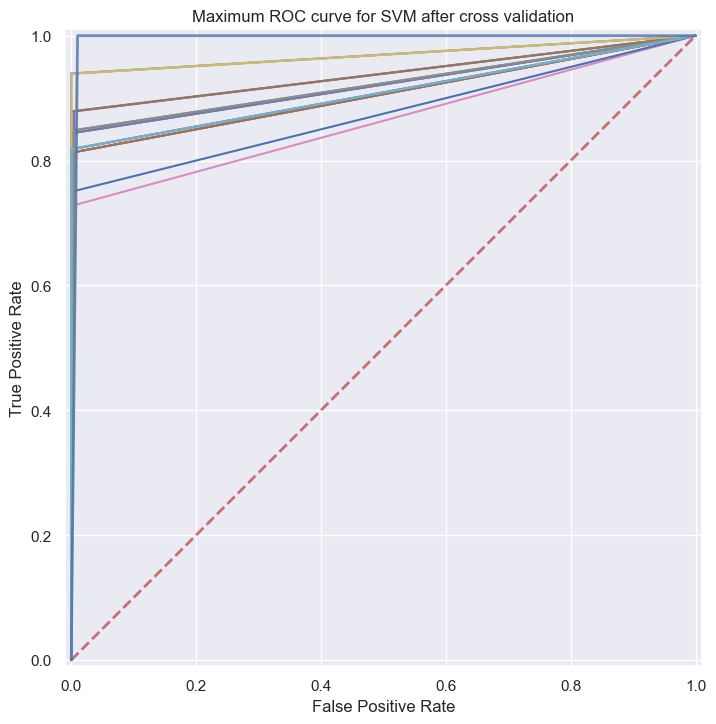

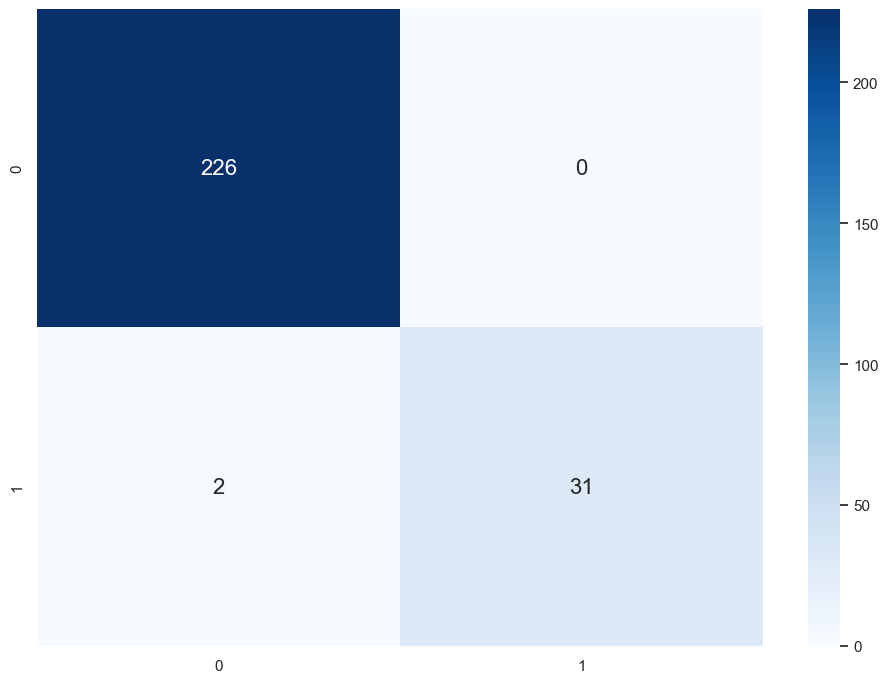

'Max_Accuracy : 1.0%'

In [76]:
# # Instantiate CVObject
# cv_object_instance = CVObject()

# # Apply cross-validation with Naive Bayes classifier
# cv_object_instance.cross_validate_Model(svm, 'r')

from sklearn.svm import SVC

# Instantiate SVM classifier
svm_classifier = SVC()

# Apply cross-validation with SVM classifier for ROC curve
cv_object_instance.cross_validate_Model(svm_classifier, 'r')

# Apply cross-validation with SVM classifier for Confusion Matrix
cv_object_instance.cross_validate_Model(svm_classifier, 'c')
